# Chapter 1: Data Understanding / Data Preparation
## Exploring Data of ETF

In [1]:
%matplotlib inline

from pathlib import Path
from scipy.stats import trim_mean
from statsmodels import robust
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles
import seaborn as sns
import matplotlib.pylab as plt
from pathlib import Path
from scipy import stats
from sklearn.utils import resample
import matplotlib.pylab as plt


Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [2]:
etf_daily  = pd.read_csv('data/iShares Core MSCI World UCITS ETF USD  EUNL.DE.csv')
etf_monthly = pd.read_csv('data/iShares Core MSCI World UCITS ETF USD (Acc)_Monthly.csv')
fed_funds = pd.read_csv('data/Leitzins_USA_FED_Banken.csv')

# Schätzungen von ETF-Daten

### Lagemaße der ETF - Adj. Close Price (1,2,3)

In [3]:
print("Average Value of Adj Close: ", np.average(etf_daily['Adj Close'], weights=etf_daily['High']))
print("Mean Value of Adj Close: ", etf_daily['Adj Close'].mean())
print("Trim Value of Adj Close :", trim_mean(etf_daily['Adj Close'], 0.1))
print("Median Value of Adj Close: ", etf_daily['Adj Close'].median())
print(wquantiles.median(etf_daily['Adj Close'], weights=etf_daily['High']))

Average Value of Adj Close:  48.91482434089686
Mean Value of Adj Close:  41.30592765749855
Trim Value of Adj Close : 40.02082893162084
Median Value of Adj Close:  39.09
47.14792254417196


### Lagemaße der the ETF Volumen (1,2,3)

In [4]:
print("Mean Value of Volume: ", etf_daily['Volume'].mean())
print("Trim Value of Volume :", trim_mean(etf_daily['Volume'], 0.1))
print("Median Value of Volume: ", etf_daily['Volume'].median())
print("Average Value of Volume: ", np.average(etf_daily['Volume'], weights=etf_daily['High']))
print(wquantiles.median(etf_daily['Volume'], weights=etf_daily['High']))

Mean Value of Volume:  165249.17139548348
Trim Value of Volume : 115422.32199710564
Median Value of Volume:  84523.5
Average Value of Volume:  232458.57559595697
154668.54868259453


### Extrema Calculation of the ETF Adj. Close and Volume

In [5]:
print("Max. Value of Adj Close: ", etf_daily['Adj Close'].max())
print("Min. Value of Adj Close: ", etf_daily['Adj Close'].min())
print("Max. Value of ETF-Volume: ", etf_daily['Volume'].max())
print("Min. Value of ETF-Volume: ", etf_daily['Volume'].min())

Max. Value of Adj Close:  79.529999
Min. Value of Adj Close:  16.51
Max. Value of ETF-Volume:  2763326
Min. Value of ETF-Volume:  0



## Streuungsmaße
### Streuungsmaße von Adj. Close Price (3,4)

In [6]:
print('Standard deviation / Standardabweichung: ', etf_daily['Adj Close'].std())
print('Interquartile range: ', etf_daily['Adj Close'].quantile(0.75) - etf_daily['Adj Close'].quantile(0.25))
print('Robuster Median: ', robust.scale.mad(etf_daily['Adj Close']))
print('Median absolute deviation:', abs(etf_daily['Adj Close'] - etf_daily['Adj Close'].median()).median() / 0.6744897501960817)

Standard deviation / Standardabweichung:  17.717813707041138
Interquartile range:  28.015499749999996
Robuster Median:  20.416915151040634
Median absolute deviation: 20.416915151040634


### Streuungsmaße ETF - Volume (3,4)

In [7]:
print('Standard deviation / Standardabweichung: ', etf_daily['Volume'].std())
print('Interquartile range: ', etf_daily['Volume'].quantile(0.75) - etf_daily['Volume'].quantile(0.25))
print('Robuster Median: ', robust.scale.mad(etf_daily['Volume']))
print('Median absolute deviation:', abs(etf_daily['Volume'] - etf_daily['Volume'].median()).median() / 0.6744897501960817)

Standard deviation / Standardabweichung:  243805.74064286158
Interquartile range:  219949.5
Robuster Median:  123451.09762719671
Median absolute deviation: 123451.09762719671


## Percentile und Boxplots
### Percentile und Boxplots für Adj. Close Price (10 , 11)

In [8]:
print(etf_daily['Adj Close'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))


0.05    19.080000
0.25    24.530000
0.50    39.090000
0.75    52.545499
0.95    73.360201
Name: Adj Close, dtype: float64


In [9]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(etf_daily['Adj Close'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

            5.0%  25.0%  50.0%      75.0%      95.0%
Adj Close  19.08  24.53  39.09  52.545499  73.360201


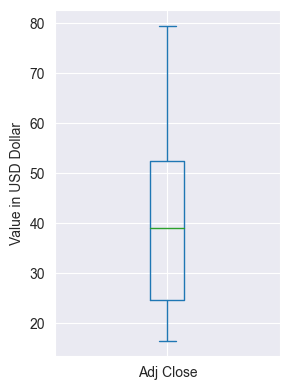

In [10]:
ax = (etf_daily['Adj Close']).plot.box(figsize=(3, 4))
ax.set_ylabel('Value in USD Dollar')

plt.tight_layout()
plt.show()

### Percentile und Boxplots für ETF - Volume (10, 11)

In [11]:
print(etf_daily['Volume'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05         0.00
0.25      5397.50
0.50     84523.50
0.75    225347.00
0.95    613231.65
Name: Volume, dtype: float64


In [12]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(etf_daily['Volume'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

        5.0%   25.0%    50.0%     75.0%      95.0%
Volume   0.0  5397.5  84523.5  225347.0  613231.65


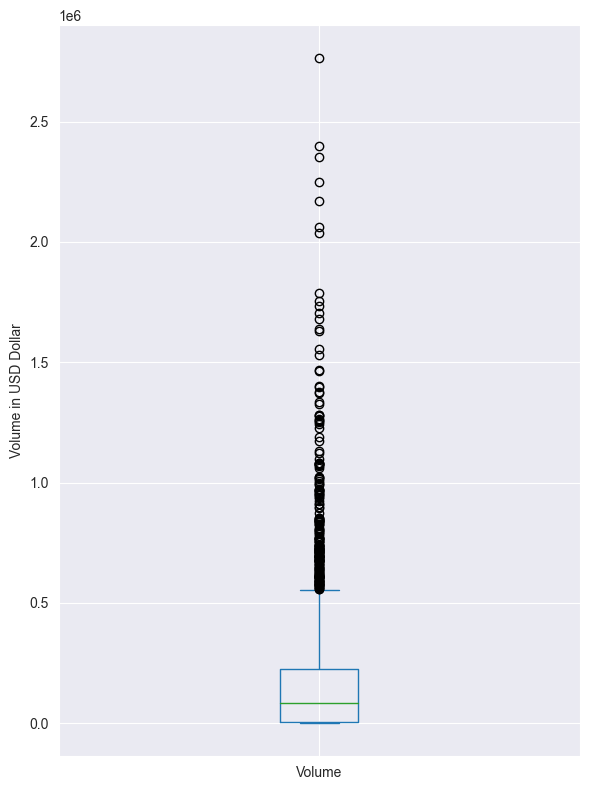

In [13]:
ax = (etf_daily['Volume']).plot.box(figsize=(6, 8))
ax.set_ylabel('Volume in USD Dollar')

plt.tight_layout()
plt.show()

## Konfidenzintervall
### Konfidenzintervall für 'Adj Close Average Price' (5)

Calculation of the adj. close average value without resampling:  48.91482434089686
Calculation of the adj. close average value with resampling: 50.14610026293525
40.2255204715955


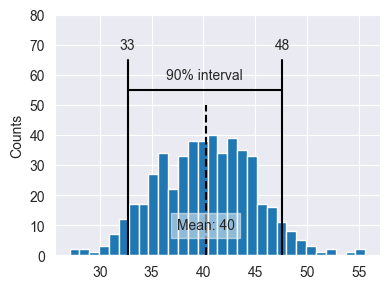

In [14]:
etf_data = etf_daily['Adj Close']
print('Calculation of the adj. close average value without resampling: ',  np.average(etf_daily['Adj Close'], weights=etf_daily['High']) )
np.random.seed(seed=3)

# create a sample of 20 etf adj close value
sample20 = resample(etf_data, n_samples=20, replace=False)
sample_weights = etf_daily.loc[sample20.index]['High']
weighted_average = np.average(sample20, weights=sample_weights)
print('Calculation of the adj. close average value with resampling:' , weighted_average)

# ----------------------------
results = []

for nrepeat in range(500):
    sample = resample(sample20)
    results.append(np.average(sample, weights=sample_weights))
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')

for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanOfAllAverageAdjCloseValue = results.mean()
print(meanOfAllAverageAdjCloseValue)
ax.plot([meanOfAllAverageAdjCloseValue, meanOfAllAverageAdjCloseValue], [0, 50], color='black', linestyle='--')
ax.text(meanOfAllAverageAdjCloseValue, 10, f'Mean: {meanOfAllAverageAdjCloseValue:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

### Konfidenzintervall Median Adj. Close Price (5)

Calculation of the adj. close mean value without resampling:  41.30592765749855
Calculation of the adj. close mean value with resampling:  40.15035045


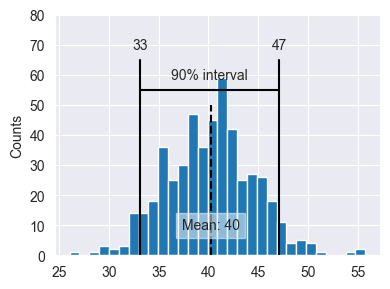

In [15]:
etf_data = etf_daily['Adj Close']
print('Calculation of the adj. close mean value without resampling: ', etf_data.mean())
np.random.seed(seed=3)
# create a sample of 20 etf adj close value
sample20 = resample(etf_data, n_samples=20, replace=False)
print('Calculation of the adj. close mean value with resampling: ',sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanAdjClose = results.mean()
ax.plot([meanAdjClose, meanAdjClose], [0, 50], color='black', linestyle='--')
ax.text(meanAdjClose, 10, f'Mean: {meanAdjClose:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

### Konfidenzintervall der Standardabweichung für Adj. Close Price (5)

Calculation of the standard deviation without resampling:  17.717813707041138
Calculation of the standard deviation with resampling:  20.56100350927726


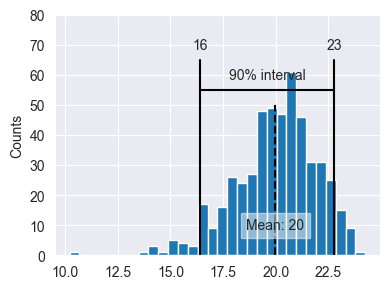

In [16]:
etf_data = etf_daily['Adj Close']
print('Calculation of the standard deviation without resampling: ',etf_daily['Adj Close'].std())
np.random.seed(seed=3)
# create a sample of 20 etf adj close value
sample20 = resample(etf_data, n_samples=20, replace=False)
print('Calculation of the standard deviation with resampling: ', sample20.std())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.std())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanOfStandardDeviationAdjClose = results.mean()
ax.plot([meanOfStandardDeviationAdjClose, meanOfStandardDeviationAdjClose], [0, 50], color='black', linestyle='--')
ax.text(meanOfStandardDeviationAdjClose, 10, f'Mean: {meanOfStandardDeviationAdjClose:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

### Standardabweichung für den interquartile range (IQR) des Adj Close Price (5)

Interquartile range without resampling :  28.015499749999996
Interquartile range without resampling : 39.87950225


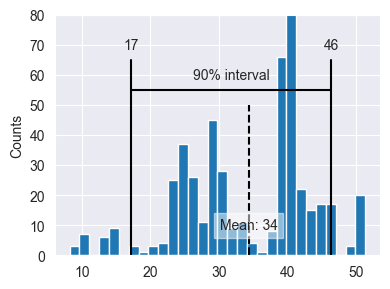

In [17]:
etf_data = etf_daily['Adj Close']
print('Interquartile range without resampling : ', etf_daily['Adj Close'].quantile(0.75) - etf_daily['Adj Close'].quantile(0.25))
np.random.seed(seed=3)


# create a sample of 20 etf adj close value
sample20 = resample(etf_data, n_samples=20, replace=False)
print('Interquartile range without resampling :' ,sample20.quantile(0.75) - sample20.quantile(0.25))


# ---------------------------------

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.quantile(0.75) - sample.quantile(0.25))
results = pd.Series(results)

# -----------------------------------

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}',
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanOfStandardDeviationAdjClose = results.mean()
ax.plot([meanOfStandardDeviationAdjClose, meanOfStandardDeviationAdjClose], [0, 50], color='black', linestyle='--')
ax.text(meanOfStandardDeviationAdjClose, 10, f'Mean: {meanOfStandardDeviationAdjClose:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

## ETF - Histogram
### Histogramm des adj. closing prices in Abhängigkeit des Frequenz

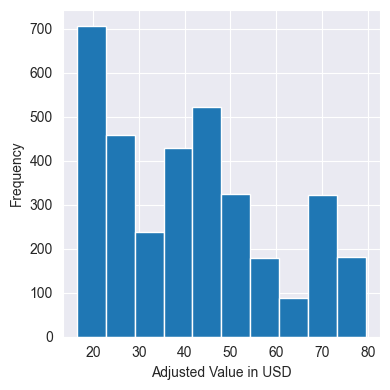

In [18]:
ax = (etf_daily['Adj Close']).plot.hist(figsize=(4, 4))
ax.set_xlabel('Adjusted Value in USD')

plt.tight_layout()
plt.show()

## Dichteschätzungen des Adj. Close Price

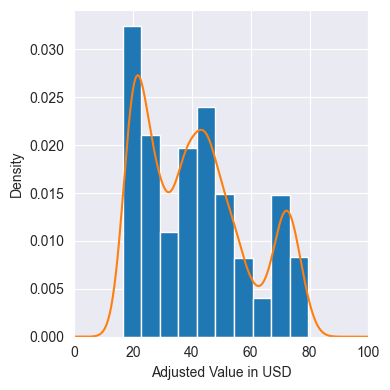

In [19]:
ax = etf_daily['Adj Close'].plot.hist(density=True, xlim=[0, 100], figsize=(4, 4))
etf_daily['Adj Close'].plot.density(ax=ax)
ax.set_xlabel('Adjusted Value in USD')

plt.tight_layout()
plt.show()

# Korrelation

## Korrelation zwischen des monatlichen Leitzinses der FED und den MSCI World Adj Close Monthly Price (6, 8)

     Adj Close  FEDFUNDS
0    16.750000      0.12
1    16.855000      0.12
2    18.010000      0.12
3    17.940001      0.11
4    18.370001      0.13
..         ...       ...
161  72.377998      4.65
162  72.566002      4.83
163  74.335999       NaN
164        NaN       NaN
165  74.723999       NaN

[166 rows x 2 columns]
0.4949510670140244


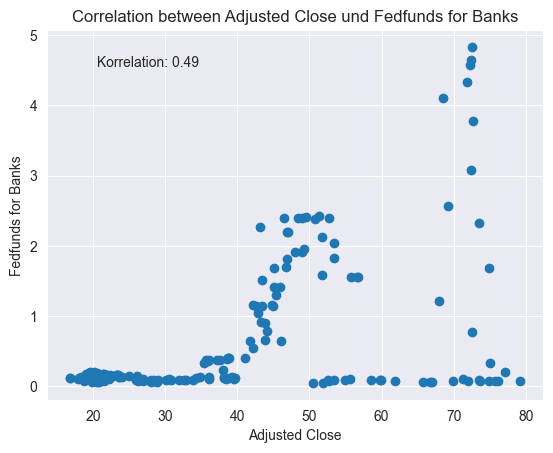

In [20]:
fed_funds = pd.read_csv('data/Leitzins_USA_FED_Banken.csv')

# Daten filtern und kombinieren
etf_filtered = etf_monthly.loc[(etf_monthly['Date'] >= '2009-10-01') & (etf_monthly['Date'] <= '2023-06-01'), ['Adj Close']]
fed_funds_filtered = fed_funds.loc[(fed_funds['DATE'] >= '2009-10-01') & (fed_funds['DATE'] <= '2023-06-01'), ['FEDFUNDS']]

# Daten zusammenführen
# reset_index()-Funktion setzt Index des Datenrahmens zurücksetzt
combined_filtered_data_etf_fedfunds_for_banks = pd.concat([etf_filtered.reset_index(drop=True), fed_funds_filtered.reset_index(drop=True)], axis=1)

print(combined_filtered_data_etf_fedfunds_for_banks)

# Korrelation berechnen
correlation = combined_filtered_data_etf_fedfunds_for_banks.corr().iloc[0, 1]
print(correlation)

# Scatterplot erstellen
plt.scatter(combined_filtered_data_etf_fedfunds_for_banks['Adj Close'], combined_filtered_data_etf_fedfunds_for_banks['FEDFUNDS'])
plt.xlabel('Adjusted Close')
plt.ylabel('Fedfunds for Banks')
plt.title('Correlation between Adjusted Close und Fedfunds for Banks')
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Plot anzeigen
plt.show()


## Korrelation zwischen dem täglichen EZB-Leitzins und MSCI World Adj Close Daily (6, 8)

In [21]:
eu_funds = pd.read_csv('data/leitzins Europa.csv')
print(eu_funds)

            Date  Percent per annum       obs. status  obs. comment
0     2023-04-22                3.5  Normal value (A)           NaN
1     2023-04-21                3.5  Normal value (A)           NaN
2     2023-04-20                3.5  Normal value (A)           NaN
3     2023-04-19                3.5  Normal value (A)           NaN
4     2023-04-18                3.5  Normal value (A)           NaN
...          ...                ...               ...           ...
5842  1999-01-05                3.0  Normal value (A)           NaN
5843  1999-01-04                3.0  Normal value (A)           NaN
5844  1999-01-03                3.0  Normal value (A)           NaN
5845  1999-01-02                3.0  Normal value (A)           NaN
5846  1999-01-01                3.0  Normal value (A)           NaN

[5847 rows x 4 columns]


            Date  Adj Close  Percent per annum
0     2009-09-25  17.209999                1.0
3454  2009-09-26  17.209999                1.0
3455  2009-09-27  17.209999                1.0
1     2009-09-28  17.209999                1.0
2     2009-09-29  17.209999                1.0
...          ...        ...                ...
3449  2023-04-26  71.529999                3.5
3450  2023-04-27  71.902000                3.5
3451  2023-04-28  72.566002                3.5
3452  2023-05-02  71.882004                3.5
3453  2023-05-03  71.938004                3.5

[4965 rows x 3 columns]
-0.22007566703365886


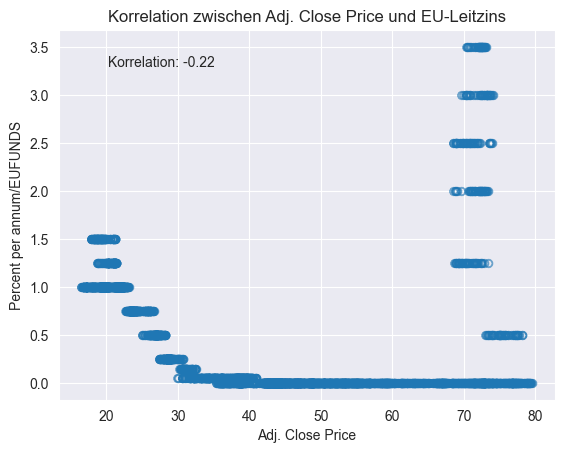

In [22]:
etf_daily = pd.read_csv('data/iShares Core MSCI World UCITS ETF USD  EUNL.DE.csv')
eu_funds = pd.read_csv('data/leitzins Europa.csv')

eu_funds_sorted = eu_funds.sort_values(by='Date')
eu_funds_sorted.to_csv('data/generatedDatasets/leitzins Europa_sorted.csv', index=False)

# Daten filtern und kombinieren
etf_filtered = etf_daily.loc[(etf_daily['Date'] >= '2009-09-25') & (etf_daily['Date'] <= '2023-06-01'), ['Date', 'Adj Close']]
eu_funds_filtered = eu_funds_sorted.loc[(eu_funds_sorted['Date'] >= '2009-09-25') & (eu_funds_sorted['Date'] <= '2023-06-01'), ['Date', 'Percent per annum']]

# Daten zusammenführen
# reset_index()-Funktion setzt Index des Datenrahmens zurücksetzt
# Datenframes anhand der Spalte 'Date' zusammenführen (outer join)
combined_filtered_data_etf_eu_funds = pd.merge(etf_filtered, eu_funds_filtered, on='Date', how='outer')

# Sortieren der Daten nach dem Datum
combined_filtered_data_etf_eu_funds.sort_values('Date', inplace=True)

# Fehlende Werte interpolieren
combined_filtered_data_etf_eu_funds.interpolate(method='linear', inplace=True)

print(combined_filtered_data_etf_eu_funds)
combined_filtered_data_etf_eu_funds.to_csv('data/generatedDatasets/test.csv', index=False)

# Korrelation berechnen
# Fall wird der Wert in der Zeile mit Index 0 und der Spalte mit Index 1 abgerufen =>Korrelation zwischen den Spalten 0 und 1 des DataFrames
combined_filtered_data_etf_eu_funds.drop('Date', axis=1, inplace=True)

correlation = combined_filtered_data_etf_eu_funds.corr().iloc[0, 1]
print(correlation)
# Scatterplot erstellen
plt.scatter(combined_filtered_data_etf_eu_funds['Adj Close'], combined_filtered_data_etf_eu_funds['Percent per annum'], marker='$\u25EF$', alpha=0.5)
plt.xlabel('Adj. Close Price')
plt.ylabel('Percent per annum/EUFUNDS')
plt.title('Korrelation zwischen Adj. Close Price und EU-Leitzins')
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)
# Plot anzeigen
plt.show()


## Berechnung Performance des MSCI World UCITS ETF USD mittels des Adj. Closed Value

0       17.209999
1       17.209999
2       17.209999
3       17.209999
4       17.209999
          ...    
3449    71.529999
3450    71.902000
3451    72.566002
3452    71.882004
3453    71.938004
Name: Adj Close, Length: 3454, dtype: float64
            Date       Open       High        Low      Close  Adj Close  \
0     2009-09-25  17.209999  17.209999  17.209999  17.209999  17.209999   
1     2009-09-28  17.209999  17.209999  17.209999  17.209999  17.209999   
2     2009-09-29  17.209999  17.209999  17.209999  17.209999  17.209999   
3     2009-09-30  17.209999  17.209999  17.209999  17.209999  17.209999   
4     2009-10-01  17.209999  17.209999  17.209999  17.209999  17.209999   
...          ...        ...        ...        ...        ...        ...   
3449  2023-04-26  71.900002  71.940002  71.122002  71.529999  71.529999   
3450  2023-04-27  71.416000  71.940002  71.321999  71.902000  71.902000   
3451  2023-04-28  72.318001  72.732002  72.110001  72.566002  72.566002   
3452  

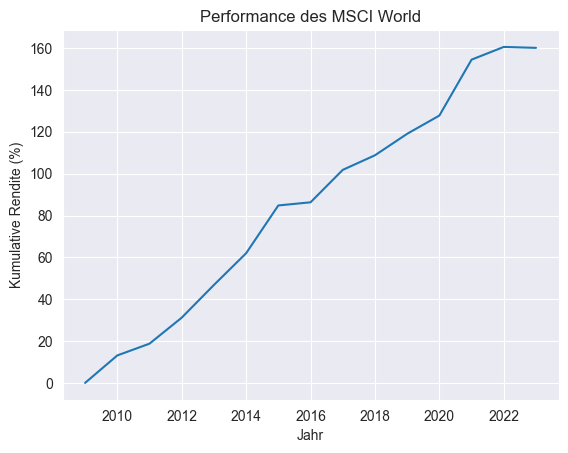

In [23]:
etf_daily = pd.read_csv('data/iShares Core MSCI World UCITS ETF USD  EUNL.DE.csv')
etf_monthly = pd.read_csv('data/iShares Core MSCI World UCITS ETF USD (Acc)_Monthly.csv')
fed_funds = pd.read_csv('data/Leitzins_USA_FED_Banken.csv')

# speichern alle Elemente der Spalte Adj Close in adj_close
adj_close = etf_daily['Adj Close']

print(adj_close)

# Berechne die täglichen Renditen aus der prozentualen Veränderung zwischen aufeinanderfolgenden Adjusted Close-Werten mittels der pct_change()
# * 100 => Daten als Prozentsatz darzustellen.
daily_returns = adj_close.pct_change() * 100

# Berechnung der kumulativen Rendite, indem man die täglichen Renditen summiert. Dies kann mit der Funktion cumsum() durchgeführt werden
cumulative_returns = daily_returns.cumsum()

# Daten in eine neue Spalte der Tabelle von etf_daily hinzufügen
etf_daily['Daily Return'] = (etf_daily['Adj Close'] - etf_daily['Adj Close'].shift(1)) / etf_daily['Adj Close'].shift(1) * 100

etf_daily['Cumulative Return'] = cumulative_returns

print(etf_daily)

etf_daily.to_csv('data/generatedDatasets/iShares Core MSCI World UCITS ETF USD (Acc) Daily - Rendite.csv', index=False)
# Visualisierung der Performance
# Konvertiere den Index in ein DateTime-Objekt
# etf_daily['Date'] = pd.to_datetime(etf_daily['Date'])

# Setze den Index auf das Datum
etf_daily['Date'] = pd.to_datetime(etf_daily['Date'])
etf_daily.set_index('Date', inplace=True)
# Resample der Daten auf jährlicher Basis und berechne die Durchschnittswerte
yearly_returns = etf_daily['Cumulative Return'].resample('Y').mean()

# Plot mit den jährlichen Renditen
plt.plot(yearly_returns.index.year, yearly_returns.values)
plt.xlabel('Jahr')
plt.ylabel('Kumulative Rendite (%)')
plt.title('Performance des MSCI World')
plt.show()


## Korrelation zwischen täglich Kurs des Währungstausch EUR-USD und dem MSCI World Adj Close Daily (6, 8)

-0.009990822128785663


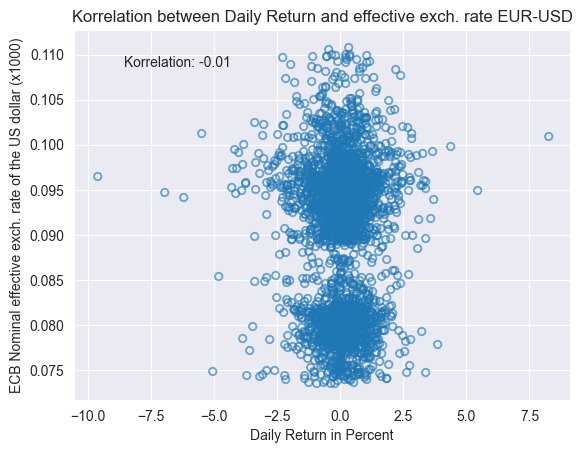

In [24]:
etf_with_return = pd.read_csv('data/generatedDatasets/iShares Core MSCI World UCITS ETF USD (Acc) Daily - Rendite.csv')
usd_eur_exchange = pd.read_csv('data/generatedDatasets/ERR_USD_Clean.csv')

etf_with_return_filtered = etf_with_return.loc[(etf_with_return['Date'] >= '2009-09-25') & (etf_with_return['Date'] <= '2023-06-01'), ['Date', 'Daily Return']]
usd_eur_exchange_filtered = usd_eur_exchange.loc[(usd_eur_exchange['Date'] >= '2009-09-25') & (usd_eur_exchange['Date'] <= '2023-06-01'), ['Date', 'ECB Nominal effective exch. rate of the US dollar against Narrow EER group of trading partners (fixed composition): EER-12']]

# Ersetzen des Strings '-' durch NaN
usd_eur_exchange_filtered['ECB Nominal effective exch. rate of the US dollar against Narrow EER group of trading partners (fixed composition): EER-12'] = usd_eur_exchange_filtered['ECB Nominal effective exch. rate of the US dollar against Narrow EER group of trading partners (fixed composition): EER-12'].replace('-', float('nan'))

# # Konvertieren der Spalte in numerischen Datentyp
usd_eur_exchange_filtered['ECB Nominal effective exch. rate of the US dollar against Narrow EER group of trading partners (fixed composition): EER-12'] = pd.to_numeric(usd_eur_exchange_filtered['ECB Nominal effective exch. rate of the US dollar against Narrow EER group of trading partners (fixed composition): EER-12'])

combined_etf_currency_data = pd.merge(etf_with_return_filtered, usd_eur_exchange_filtered, on='Date')

combined_etf_currency_data = combined_etf_currency_data.dropna(subset=['ECB Nominal effective exch. rate of the US dollar against Narrow EER group of trading partners (fixed composition): EER-12'])

# Sortieren der Daten nach dem Datum
combined_etf_currency_data.sort_values('Date', inplace=True)

# Fehlende Werte interpolieren
combined_etf_currency_data.interpolate(method='linear', inplace=True)

# print(combined_etf_currency_data)
combined_etf_currency_data.to_csv('data/generatedDatasets/test2.csv', index=False)

# Korrelation berechnen
# Fall wird der Wert in der Zeile mit Index 0 und der Spalte mit Index 1 abgerufen =>Korrelation zwischen den Spalten 0 und 1 des DataFrames
combined_etf_currency_data.drop('Date', axis=1, inplace=True)
correlation = combined_etf_currency_data.corr().iloc[0, 1]
print(correlation)
# Scatterplot erstellen
plt.scatter(combined_etf_currency_data['Daily Return'], combined_etf_currency_data['ECB Nominal effective exch. rate of the US dollar against Narrow EER group of trading partners (fixed composition): EER-12'] / 1000, marker='$\u25EF$', alpha=0.5)
plt.xlabel('Daily Return in Percent')
plt.ylabel('ECB Nominal effective exch. rate of the US dollar (x1000)')
plt.title('Korrelation between Daily Return and effective exch. rate EUR-USD')
plt.text(0.1, 0.9, f'Korrelation: {correlation:.2f}', transform=plt.gca().transAxes)

# Plot anzeigen
plt.show()



## Datenanalyse für die Frage: Warum haben die FED-Fonds einen höheren Korrelationswert als die EU-Fonds?

                  Standort  Gewichtung (%)
22      Vereinigte Staaten           68.73
12                   Japan            6.24
23  Vereinigtes Königreich            4.13
7               Frankreich            3.39
13                  Kanada            3.21
19                 Schweiz            2.86
3              Deutschland            2.39
1               Australien            2.03
15             Niederlande            1.30
18                Schweden            0.95
4                 Dänemark            0.88
21                 Spanien            0.69
8                 Hongkong            0.68
11                 Italien            0.67
9                   Irland            0.42
20                Singapur            0.37
2                  Belgien            0.26
6                 Finnland            0.25
16                Norwegen            0.19
10                  Israel            0.19
17                Portugal            0.06
24              Österreich            0.05
14         

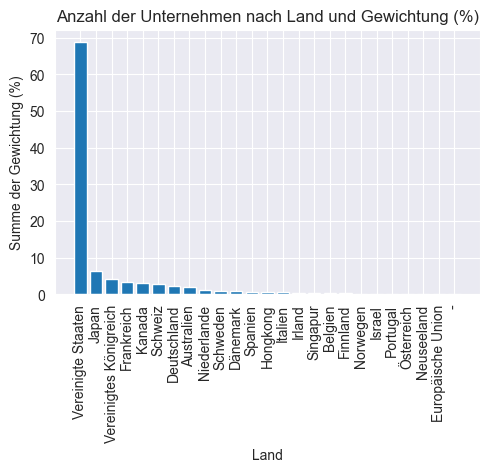

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
holdings_of_etf = pd.read_csv('data/EUNL_holdings_MSCI_World.csv', skiprows=2)
# sumdata = sum(data['Gewichtung (%)'])
# print(sumdata)

# Umwandlung der Spalte "Gewichtung (%)" in den Datentyp float
holdings_of_etf['Gewichtung (%)'] = holdings_of_etf['Gewichtung (%)'].str.replace(',', '.').astype(float)

# Gruppieren nach Land und Summe der Kurse berechnen
grouped_data = holdings_of_etf.groupby('Standort')['Gewichtung (%)'].sum().reset_index()

# Nach höchster Gewichtung sortieren
grouped_data = grouped_data.sort_values('Gewichtung (%)', ascending=False)

print(grouped_data)
#Diagramm erstellen
plt.figure(figsize=(5, 4))
plt.bar(grouped_data['Standort'], grouped_data['Gewichtung (%)'])
plt.xlabel('Land')
plt.ylabel('Summe der Gewichtung (%)')
plt.title('Anzahl der Unternehmen nach Land und Gewichtung (%)')
plt.xticks(rotation=90)
# Platz für Achsentexte schaffen
plt.tight_layout()

# Manuelle Anpassung des Layouts
plt.subplots_adjust(bottom=0.25)  # Nach Bedarf anpassen


# Diagramm anzeigen
plt.show()

## Hexagonal binning and Contours
### Hexagonal binning plotting of Adj Close Value and Fedfunds for Banks (7)

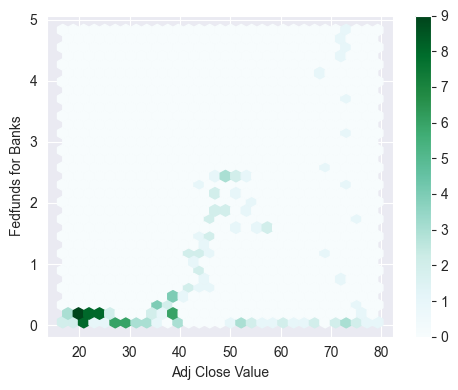

In [26]:
ax = combined_filtered_data_etf_fedfunds_for_banks.plot.hexbin(x='Adj Close', y='FEDFUNDS',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Adj Close Value')
ax.set_ylabel('Fedfunds for Banks')

plt.tight_layout()
plt.show()

### Contours plotting of Adj Close Value and Fedfunds for Banks (7)

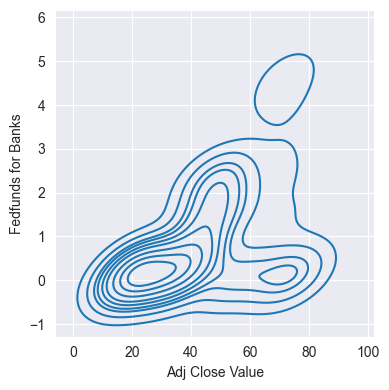

In [27]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=combined_filtered_data_etf_fedfunds_for_banks, x='Adj Close', y='FEDFUNDS', ax=ax)
ax.set_xlabel('Adj Close Value')
ax.set_ylabel('Fedfunds for Banks')

plt.tight_layout()
plt.show()